<a href="https://colab.research.google.com/github/NataSamo/Python-ML/blob/main/ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

In [ ]:
files.upload()
data3 = np.loadtxt('3.txt')

Saving 3.txt to 3.txt


In [ ]:
files.upload()
data9 = np.loadtxt('9.txt')

Saving 9.txt to 9.txt


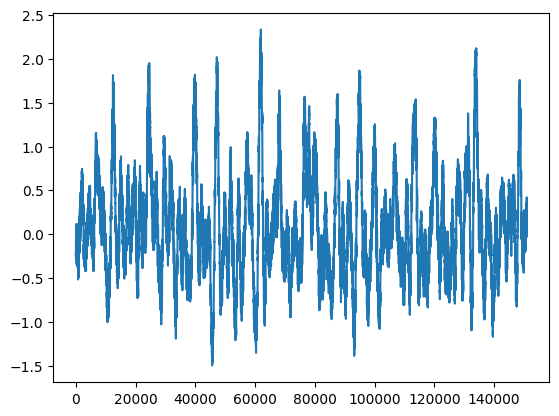

In [ ]:
ns = len(data3)
time = np.arange(ns)
plt.plot(time, data3)


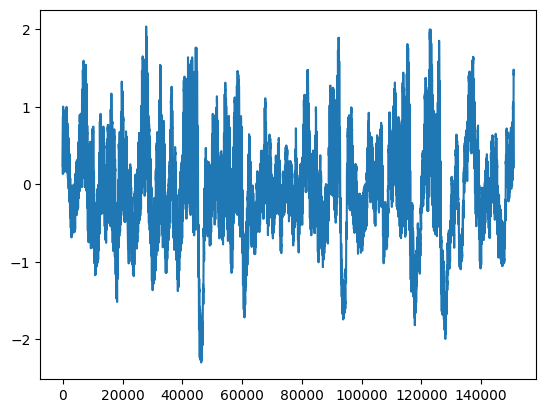

In [ ]:
ns = len(data9)
time = np.arange(ns)
plt.plot(time, data9)

In [ ]:
np.corrcoef(data3, data9)

array([[1.        , 0.07033876],
       [0.07033876, 1.        ]])

In [ ]:
corr_same = np.correlate(data3, data9, mode='same')
corr_same.max()


17069.233589444622

In [ ]:
corr_full = np.correlate(data9, data3, mode='full')
corr_full.max()

17069.233589444622

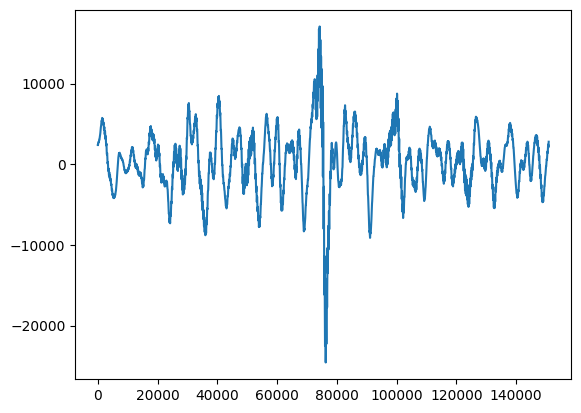

In [ ]:
ns = len(corr_same)
time = np.arange(ns)
plt.plot(time, corr_same)

In [ ]:
ind_max_corr = corr_full.argmax()
ind_max_corr = ind_max_corr / 250 * 60
ind_max_corr

36511.44

In [ ]:
np.roll(data3, -250 * 60 * 2)
np.correlate(data3, data9)

array([4739.47321282])

In [ ]:
forward_shift_table = pd.DataFrame(columns=['Shift', 'Correlate'])

In [ ]:
def my_corrcoef( x, y ):
    mean_x = np.mean( x )
    mean_y = np.mean( y )
    std_x  = np.std ( x )
    std_y  = np.std ( y )
    n      = len    ( x )
    return np.correlate( x - mean_x, y - mean_y, mode = 'valid' )[0] / n / ( std_x * std_y )

forward_shift_table
forward_shift_table.loc[len(forward_shift_table.index)] = [0, my_corrcoef(data3, data9 )]


In [ ]:
back_shift_table = pd.DataFrame(columns=['Shift', 'Correlate'])
back_shift_table.loc[len(back_shift_table.index)] = [0, my_corrcoef(data3, data9 )]
back_shift_table

,Shift,Correlate
0,0.0,0.070339


In [ ]:
temp_second_heart = np.copy(data9)
for i in range(120):
  temp_second_heart = np.roll(temp_second_heart, 250)
  forward_shift_table.loc[len(forward_shift_table.index)] = [(i + 1), my_corrcoef(data3, temp_second_heart)]
forward_shift_table
print('Максимальная корреляция по значению при положительном сдвиге на 2 минуты вперёд: ', forward_shift_table['Correlate'].max())

Максимальная корреляция по значению при положительном сдвиге на 2 минуты вперёд:  0.11321314607833023


In [ ]:
temp_second_heart = np.copy(data9)
for j in range(120):
  temp_second_heart = np.roll(temp_second_heart, -250)
  back_shift_table.loc[back_shift_table.shape[0]] = [-(j + 1), my_corrcoef(data3, temp_second_heart)]
back_shift_table
print('Максимальная корреляция по значению при положительном сдвиге на 2 минуты назад: ', back_shift_table['Correlate'].max())

Максимальная корреляция по значению при положительном сдвиге на 2 минуты назад:  0.2309240294754427
